# Thyroid_Diease_Detection

## Problem Statement

;
; Thyroid disease records supplied by the Garavan Institute and J. Ross
; Quinlan, New South Wales Institute, Syndney, Australia.
;
; 1987.
;

This directory contains the latest version of an archive of thyroid diagnoses
obtained from the Garvan Institute, consisting of 9172 records from 1984 to
early 1987.  Each record looks like

	(29 attribute values), diagnoses [record identification]

The attributes are given in order and separated by commas.  Unknown attribute
values are indicated by question marks.  The attributes are

	Attribute Name			Possible Values
	--------------			---------------
	age:				continuous.
	sex:				M, F.
	on thyroxine:			f, t.
	query on thyroxine:		f, t.
	on antithyroid medication:	f, t.
	sick:				f, t.
	pregnant:			f, t.
	thyroid surgery:		f, t.
	I131 treatment:			f, t.
	query hypothyroid:		f, t.
	query hyperthyroid:		f, t.
	lithium:			f, t.
	goitre:				f, t.
	tumor:				f, t.
	hypopituitary:			f, t.
	psych:				f, t.
	TSH measured:			f, t.
	TSH:				continuous.
	T3 measured:			f, t.
	T3:				continuous.
	TT4 measured:			f, t.
	TT4:				continuous.
	T4U measured:			f, t.
	T4U:				continuous.
	FTI measured:			f, t.
	FTI:				continuous.
	TBG measured:			f, t.
	TBG:				continuous.
	referral source:		WEST, STMW, SVHC, SVI, SVHD, other.

The diagnosis consists of a string of letters indicating diagnosed conditions.
A diagnosis "-" indicates no condition requiring comment.  A diagnosis of the
form "X|Y" is interpreted as "consistent with X, but more likely Y".  The
conditions are divided into groups where each group corresponds to a class of
comments.

		Letter	Diagnosis
		------	---------

	hyperthyroid conditions:

		A	hyperthyroid
		B	T3 toxic
		C	toxic goitre
		D	secondary toxic

	hypothyroid conditions:

		E	hypothyroid
		F	primary hypothyroid
		G	compensated hypothyroid
		H	secondary hypothyroid

	binding protein:

		I	increased binding protein
		J	decreased binding protein

	general health:

		K	concurrent non-thyroidal illness

	replacement therapy:

		L	consistent with replacement therapy
		M	underreplaced
		N	overreplaced

	antithyroid treatment:

		O	antithyroid drugs
		P	I131 treatment
		Q	surgery

	miscellaneous:

		R	discordant assay results
		S	elevated TBG
		T	elevated thyroid hormones

In experiments with an earlier version of this archive, decision trees were
derived for the most frequent classes of comments, namely

	hyperthyroid conditions (A, B, C, D)
	hypothyroid conditions (E, F, G, H)
	binding protein (I, J)
	general health (K)
	replacement therapy (L, M, N)
	discordant results (R)

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None) #this code is used to display all columns
pd.set_option('display.max_rows', None) #this code is used to display all columns

### Load  Dataset

In [2]:
thyroid=pd.read_csv(r"C:\Users\harsh\Downloads\krish naik\ML_Projects End to end\Thyroid-Diease-Detection\data\thyroid0387.csv",header=None)
thyroid.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,29,F,f,f,f,f,f,f,f,t,f,f,f,f,f,f,t,0.3,f,?,f,?,f,?,f,?,f,?,other,-[840801013]
1,29,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.6,t,1.9,t,128,f,?,f,?,f,?,other,-[840801014]
2,41,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,11,other,-[840801042]
3,36,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,26,other,-[840803046]
4,32,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,36,other,S[840803047]


In [3]:
#alloting name to each feature
feature_columns=['age',
'sex',
'on thyroxine',
'query on thyroxine',
'on antithyroid medication',
'sick',
'pregnant',
'thyroid surgery',
'I131 treatment',
'query hypothyroid',
'query hyperthyroid',
'lithium',
'goitre',
'tumor',
'hypopituitary',
'psych',
'TSH measured',
'TSH',
'T3 measured',
'T3',
'TT4 measured',
'TT4',
'T4U measured',
'T4U',
'FTI measured',
'FTI',
'TBG measured',
'TBG',
'referral source',
'target']

In [4]:
thyroid.columns=feature_columns
thyroid.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,target
0,29,F,f,f,f,f,f,f,f,t,f,f,f,f,f,f,t,0.3,f,?,f,?,f,?,f,?,f,?,other,-[840801013]
1,29,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.6,t,1.9,t,128,f,?,f,?,f,?,other,-[840801014]
2,41,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,11,other,-[840801042]
3,36,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,26,other,-[840803046]
4,32,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,36,other,S[840803047]


In [5]:
thyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        9172 non-null   int64 
 1   sex                        9172 non-null   object
 2   on thyroxine               9172 non-null   object
 3   query on thyroxine         9172 non-null   object
 4   on antithyroid medication  9172 non-null   object
 5   sick                       9172 non-null   object
 6   pregnant                   9172 non-null   object
 7   thyroid surgery            9172 non-null   object
 8   I131 treatment             9172 non-null   object
 9   query hypothyroid          9172 non-null   object
 10  query hyperthyroid         9172 non-null   object
 11  lithium                    9172 non-null   object
 12  goitre                     9172 non-null   object
 13  tumor                      9172 non-null   object
 14  hypopitu

In [6]:
thyroid.shape

(9172, 30)

In [7]:
#Droping column which is not use full as when we do feature engineering to neighbour column it will indicate true
thyroid.drop(['referral source','T3 measured','TSH measured','TSH measured','TT4 measured','T4U measured','FTI measured','TBG measured'],axis=1,inplace=True)

In [8]:
thyroid.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
0,29,F,f,f,f,f,f,f,f,t,f,f,f,f,f,f,0.3,?,?,?,?,?,-[840801013]
1,29,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,1.6,1.9,128,?,?,?,-[840801014]
2,41,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,?,?,?,?,?,11,-[840801042]
3,36,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,?,?,?,?,26,-[840803046]
4,32,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,?,?,?,?,36,S[840803047]


In [9]:
thyroid.shape

(9172, 23)

In [10]:
target=thyroid.target  #selecting target column and alloting target as variable
create=target.str.split('([A-Za-z])',expand=True) #splitting and expanding target column
create=create[1] #selecting first index
target=create.replace({None:'Z'}) #here z is none type
thyroid.target=target #updating target values in dataframe
thyroid.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
0,29,F,f,f,f,f,f,f,f,t,f,f,f,f,f,f,0.3,?,?,?,?,?,Z
1,29,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,1.6,1.9,128,?,?,?,Z
2,41,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,?,?,?,?,?,11,Z
3,36,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,?,?,?,?,26,Z
4,32,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,?,?,?,?,36,S


In [11]:
thyroid.target.unique()

array(['Z', 'S', 'F', 'A', 'R', 'I', 'M', 'N', 'G', 'K', 'L', 'Q', 'J',
       'C', 'O', 'H', 'D', 'P', 'B', 'E'], dtype=object)

In experiments with an earlier version of this archive, decision trees were
derived for the most frequent classes of comments, namely

hyperthyroid conditions (A, B, C, D)

hypothyroid conditions (E, F, G, H)

binding protein (I, J)

general health (K)

replacement therapy (L, M, N)

discordant results (R)

None values(Z)

In [12]:
#now we want to impute null values  but in this case null vales markes as '?'.s0,we can replace it with nan
thyroid=thyroid.replace(['?'],np.nan)

In [13]:
thyroid.isnull().sum()

age                             0
sex                           307
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH                           842
T3                           2604
TT4                           442
T4U                           809
FTI                           802
TBG                          8823
target                          0
dtype: int64

In [14]:
#TBG has majority null values so no use of that column
thyroid.drop('TBG',axis=1,inplace=True)

In [15]:
thyroid.isnull().sum()

age                             0
sex                           307
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH                           842
T3                           2604
TT4                           442
T4U                           809
FTI                           802
target                          0
dtype: int64

In [16]:
#we have female patients as mode in sex.so,replace with F
thyroid['sex'].mode().iloc[0]

'F'

In [17]:
#for categorical we replace nan values with mode
thyroid['sex']=thyroid['sex'].fillna(thyroid['sex'].mode().iloc[0])

In [18]:
#for numerical we replace nan values with median
thyroid['TSH']=thyroid['TSH'].fillna(thyroid['TSH'].median())
thyroid['T3']=thyroid['T3'].fillna(thyroid['T3'].median())
thyroid['TT4']=thyroid['TT4'].fillna(thyroid['TT4'].median())
thyroid['T4U']=thyroid['T4U'].fillna(thyroid['T4U'].median())
thyroid['FTI']=thyroid['FTI'].fillna(thyroid['FTI'].median())

In [19]:
thyroid.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
target                       0
dtype: int64

In [20]:
thyroid.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,target
0,29,F,f,f,f,f,f,f,f,t,f,f,f,f,f,f,0.3,1.9,104.0,0.96,109.0,Z
1,29,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,1.6,1.9,128,0.96,109.0,Z
2,41,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,1.4,1.9,104.0,0.96,109.0,Z
3,36,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,1.4,1.9,104.0,0.96,109.0,Z
4,32,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,1.4,1.9,104.0,0.96,109.0,S


In [21]:
thyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        9172 non-null   int64 
 1   sex                        9172 non-null   object
 2   on thyroxine               9172 non-null   object
 3   query on thyroxine         9172 non-null   object
 4   on antithyroid medication  9172 non-null   object
 5   sick                       9172 non-null   object
 6   pregnant                   9172 non-null   object
 7   thyroid surgery            9172 non-null   object
 8   I131 treatment             9172 non-null   object
 9   query hypothyroid          9172 non-null   object
 10  query hyperthyroid         9172 non-null   object
 11  lithium                    9172 non-null   object
 12  goitre                     9172 non-null   object
 13  tumor                      9172 non-null   object
 14  hypopitu

In [22]:
#TSH,T3,TT4,T4U,FTI was showing as object even though we had numerical vales.
#so,we are converting object to numerical
thyroid['TSH'] = pd.to_numeric(thyroid['TSH'])
thyroid['T3'] = pd.to_numeric(thyroid['T3'])
thyroid['TT4'] = pd.to_numeric(thyroid['TT4'])
thyroid['T4U'] = pd.to_numeric(thyroid['T4U'])
thyroid['FTI'] = pd.to_numeric(thyroid['FTI'])

In [23]:
thyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        9172 non-null   int64  
 1   sex                        9172 non-null   object 
 2   on thyroxine               9172 non-null   object 
 3   query on thyroxine         9172 non-null   object 
 4   on antithyroid medication  9172 non-null   object 
 5   sick                       9172 non-null   object 
 6   pregnant                   9172 non-null   object 
 7   thyroid surgery            9172 non-null   object 
 8   I131 treatment             9172 non-null   object 
 9   query hypothyroid          9172 non-null   object 
 10  query hyperthyroid         9172 non-null   object 
 11  lithium                    9172 non-null   object 
 12  goitre                     9172 non-null   object 
 13  tumor                      9172 non-null   objec

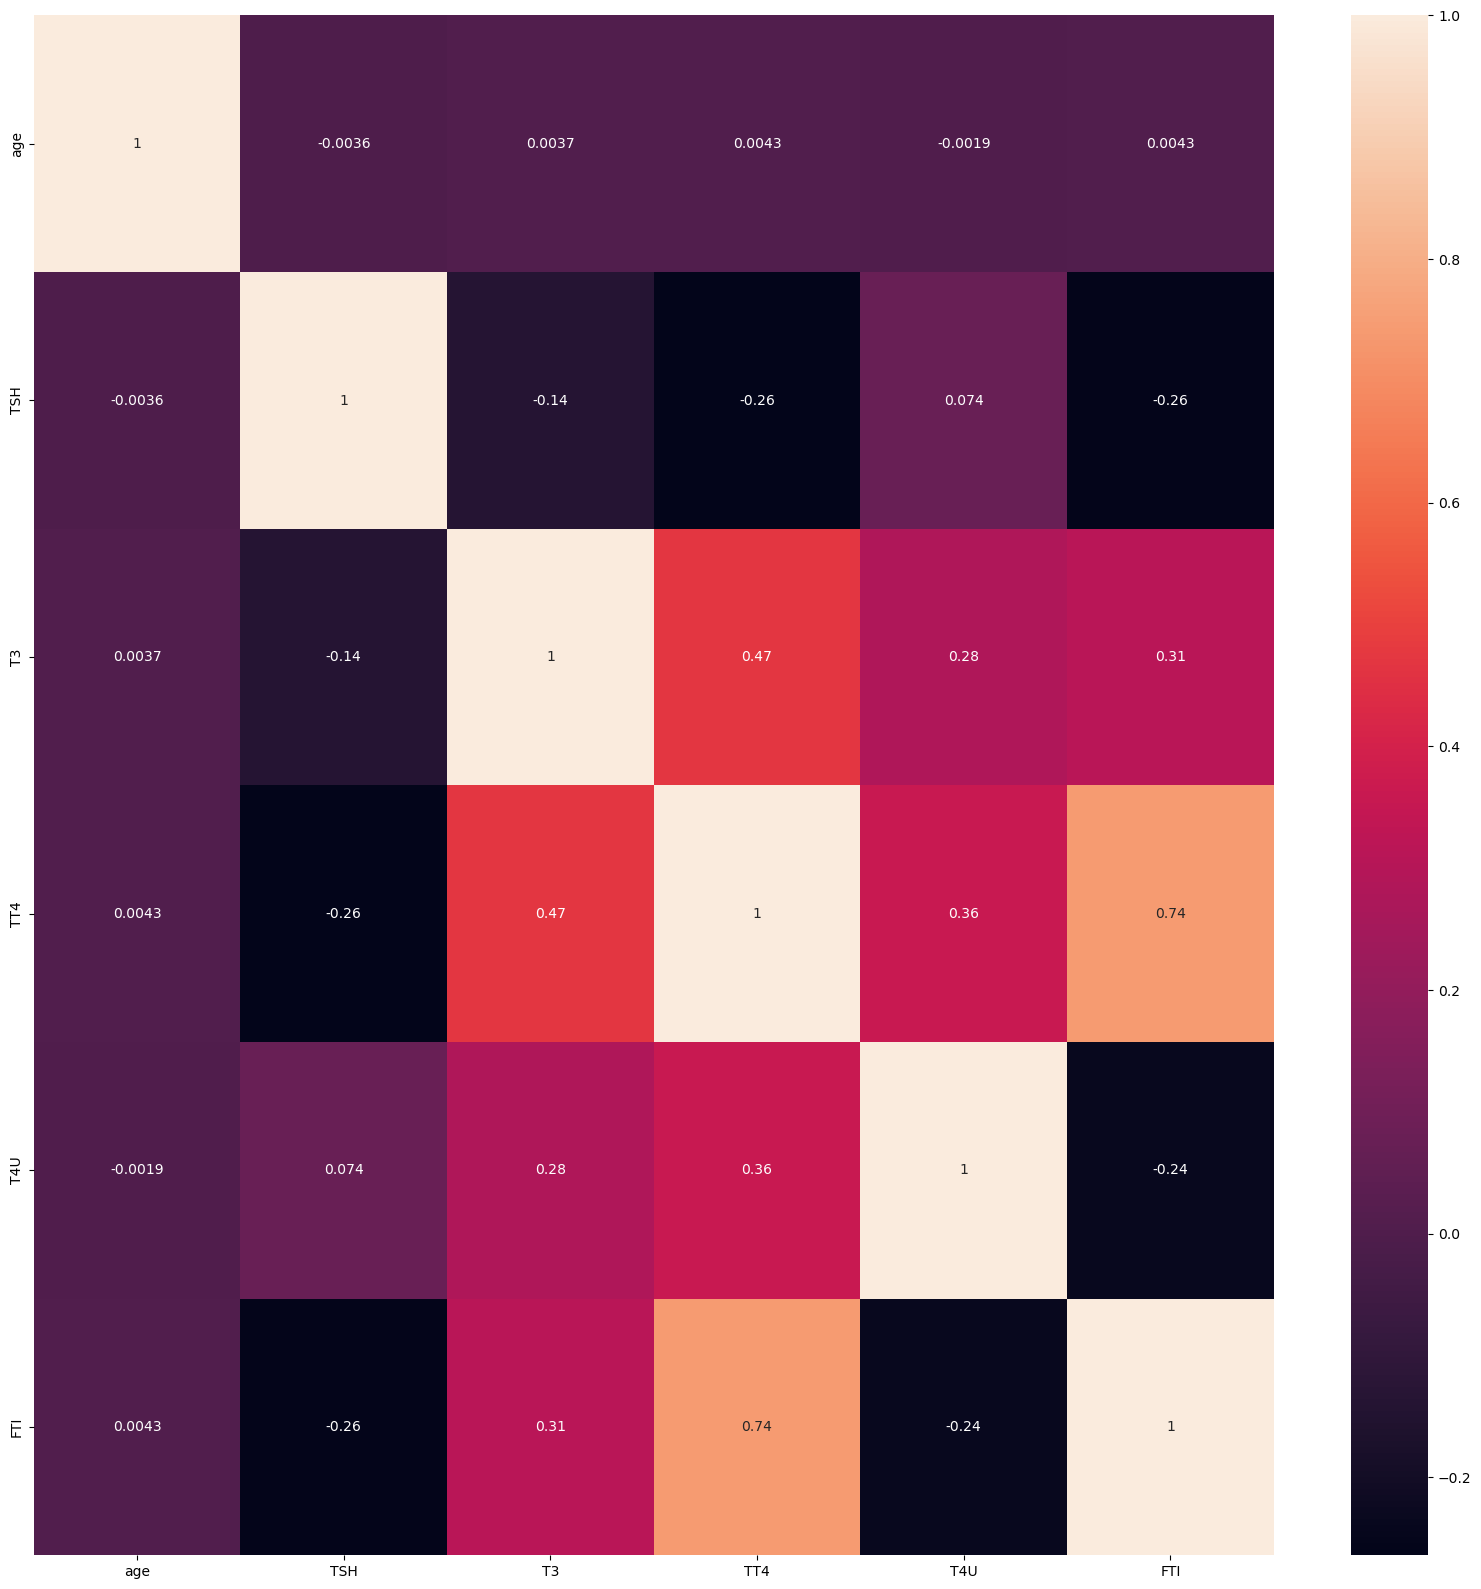

In [24]:
#we cant see corelation for all features.so,we need to do label encoding for catagorical value
plt.figure(figsize=(20,20))
sns.heatmap(thyroid.corr(),annot=True)
plt.show()

In [25]:
from sklearn.preprocessing import LabelEncoder
cols=thyroid.select_dtypes(include=['object'])
cols.head()

,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,target
0,F,f,f,f,f,f,f,f,t,f,f,f,f,f,f,Z
1,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,Z
2,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,Z
3,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,Z
4,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,S


In [26]:
for i in cols.columns:
    try:
          thyroid[i]=LabelEncoder().fit_transform(thyroid[i])
    except:
        continue

In [27]:
thyroid.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,target
0,29,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.3,1.9,104.0,0.96,109.0,19
1,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.6,1.9,128.0,0.96,109.0,19
2,41,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.4,1.9,104.0,0.96,109.0,19
3,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.4,1.9,104.0,0.96,109.0,19
4,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.4,1.9,104.0,0.96,109.0,18


In [28]:
#now we can see their is correlation in some features
for a in range(len(thyroid.corr())):
    for b in range(a):
        if(thyroid.corr().iloc[a,b])>=.7:
            print(thyroid.corr().columns[b])

TT4


In [29]:
#so TT4 has high correlation among all.so,we can remove
thyroid.drop('TT4',axis=1,inplace=True)

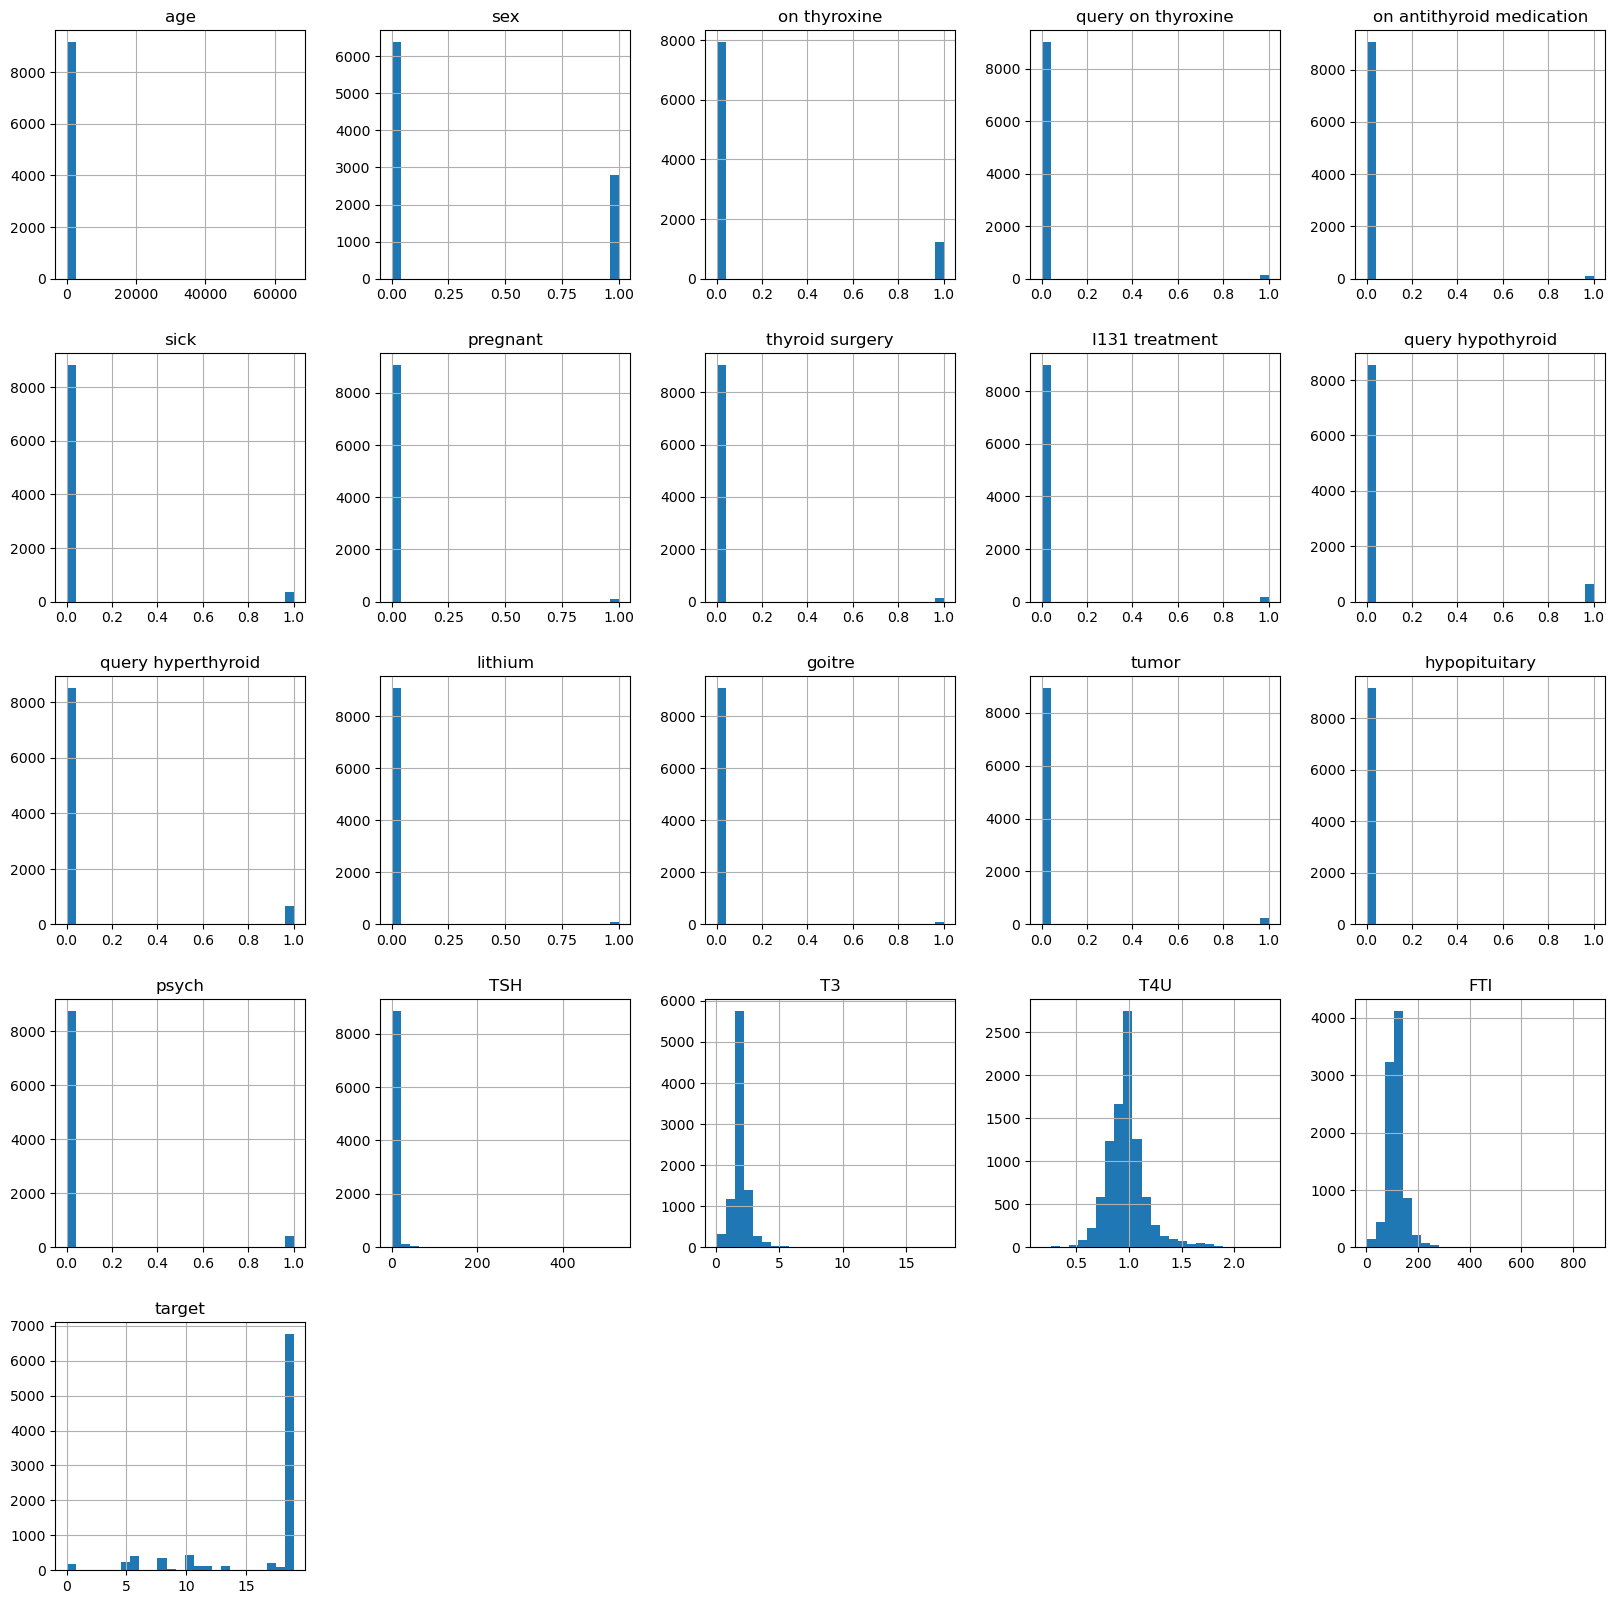

In [30]:
thyroid.hist(bins=25,figsize=(20,20));

Now we can see the data normally distributed in some features and some are categorical now we have have to normalize the values.Because most of the values lies between 0 to 500 in x-axis

### Preprocessing techniques

In [31]:
X=thyroid.iloc[:,:-1]
y=thyroid.iloc[:,-1]

In [32]:
data=X #for on ngoing process without PCA
len(y.unique()) #we can see 20 unique values

20

### PCA Technique

First we use PCA then see the result then we move to marmal modeling(without PCA)

In [33]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10).fit_transform(X) #selecting 10 no of components and further training and transforming it.

In [34]:
pca

array([[-4.45561191e+01, -3.17367096e+00, -5.35704036e+00, ...,
         8.56989591e-01, -1.65616290e-03, -6.97420427e-02],
       [-4.45562098e+01, -3.44669836e+00, -4.08660999e+00, ...,
        -7.89602189e-03, -3.72996845e-02, -5.39334402e-02],
       [-3.25561920e+01, -3.40611232e+00, -4.28163568e+00, ...,
        -4.69670547e-01,  8.70402283e-02,  3.14229695e-03],
       ...,
       [-4.55910339e+00, -2.29643129e+01, -8.48591764e+00, ...,
        -1.70042874e-02, -7.75105196e-02, -5.35313703e-02],
       [-2.65592541e+01, -2.39377499e+01, -8.69592628e+00, ...,
        -1.27471835e-02, -3.84126190e-02, -5.63461088e-02],
       [-4.25625989e+01, -4.64216001e+01, -1.35319478e+01, ...,
         8.44006854e-01, -4.45593437e-02, -7.42081055e-02]])

In [35]:
#creating dataframe
X_pca=pd.DataFrame(data=pca,columns=['component_1','component_2','component_3','component_4','component_5','component_6','component_7','component_8','component_9','component_10'])
X_pca.head()

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10
0,-44.556119,-3.173671,-5.357040,-0.037151,-0.343814,0.019291,0.365002,0.856990,-0.001656,-0.069742
1,-44.556210,-3.446698,-4.086610,-0.019277,-0.276060,0.180989,-0.102125,-0.007896,-0.037300,-0.053933
2,-32.556192,-3.406112,-4.281636,0.039060,-0.315299,0.249356,0.766114,-0.469671,0.087040,0.003142
3,-37.556196,-3.405757,-4.281873,-0.019680,-0.276340,0.180843,-0.102100,-0.007829,-0.037309,-0.053981
4,-41.556196,-3.405128,-4.282026,-0.019675,-0.276317,0.180849,-0.102086,-0.007837,-0.037312,-0.053983


In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
for i in X_pca.columns:
    X_pca[i]=scaler.fit_transform(X_pca[[i]]) #Normalizing the data 

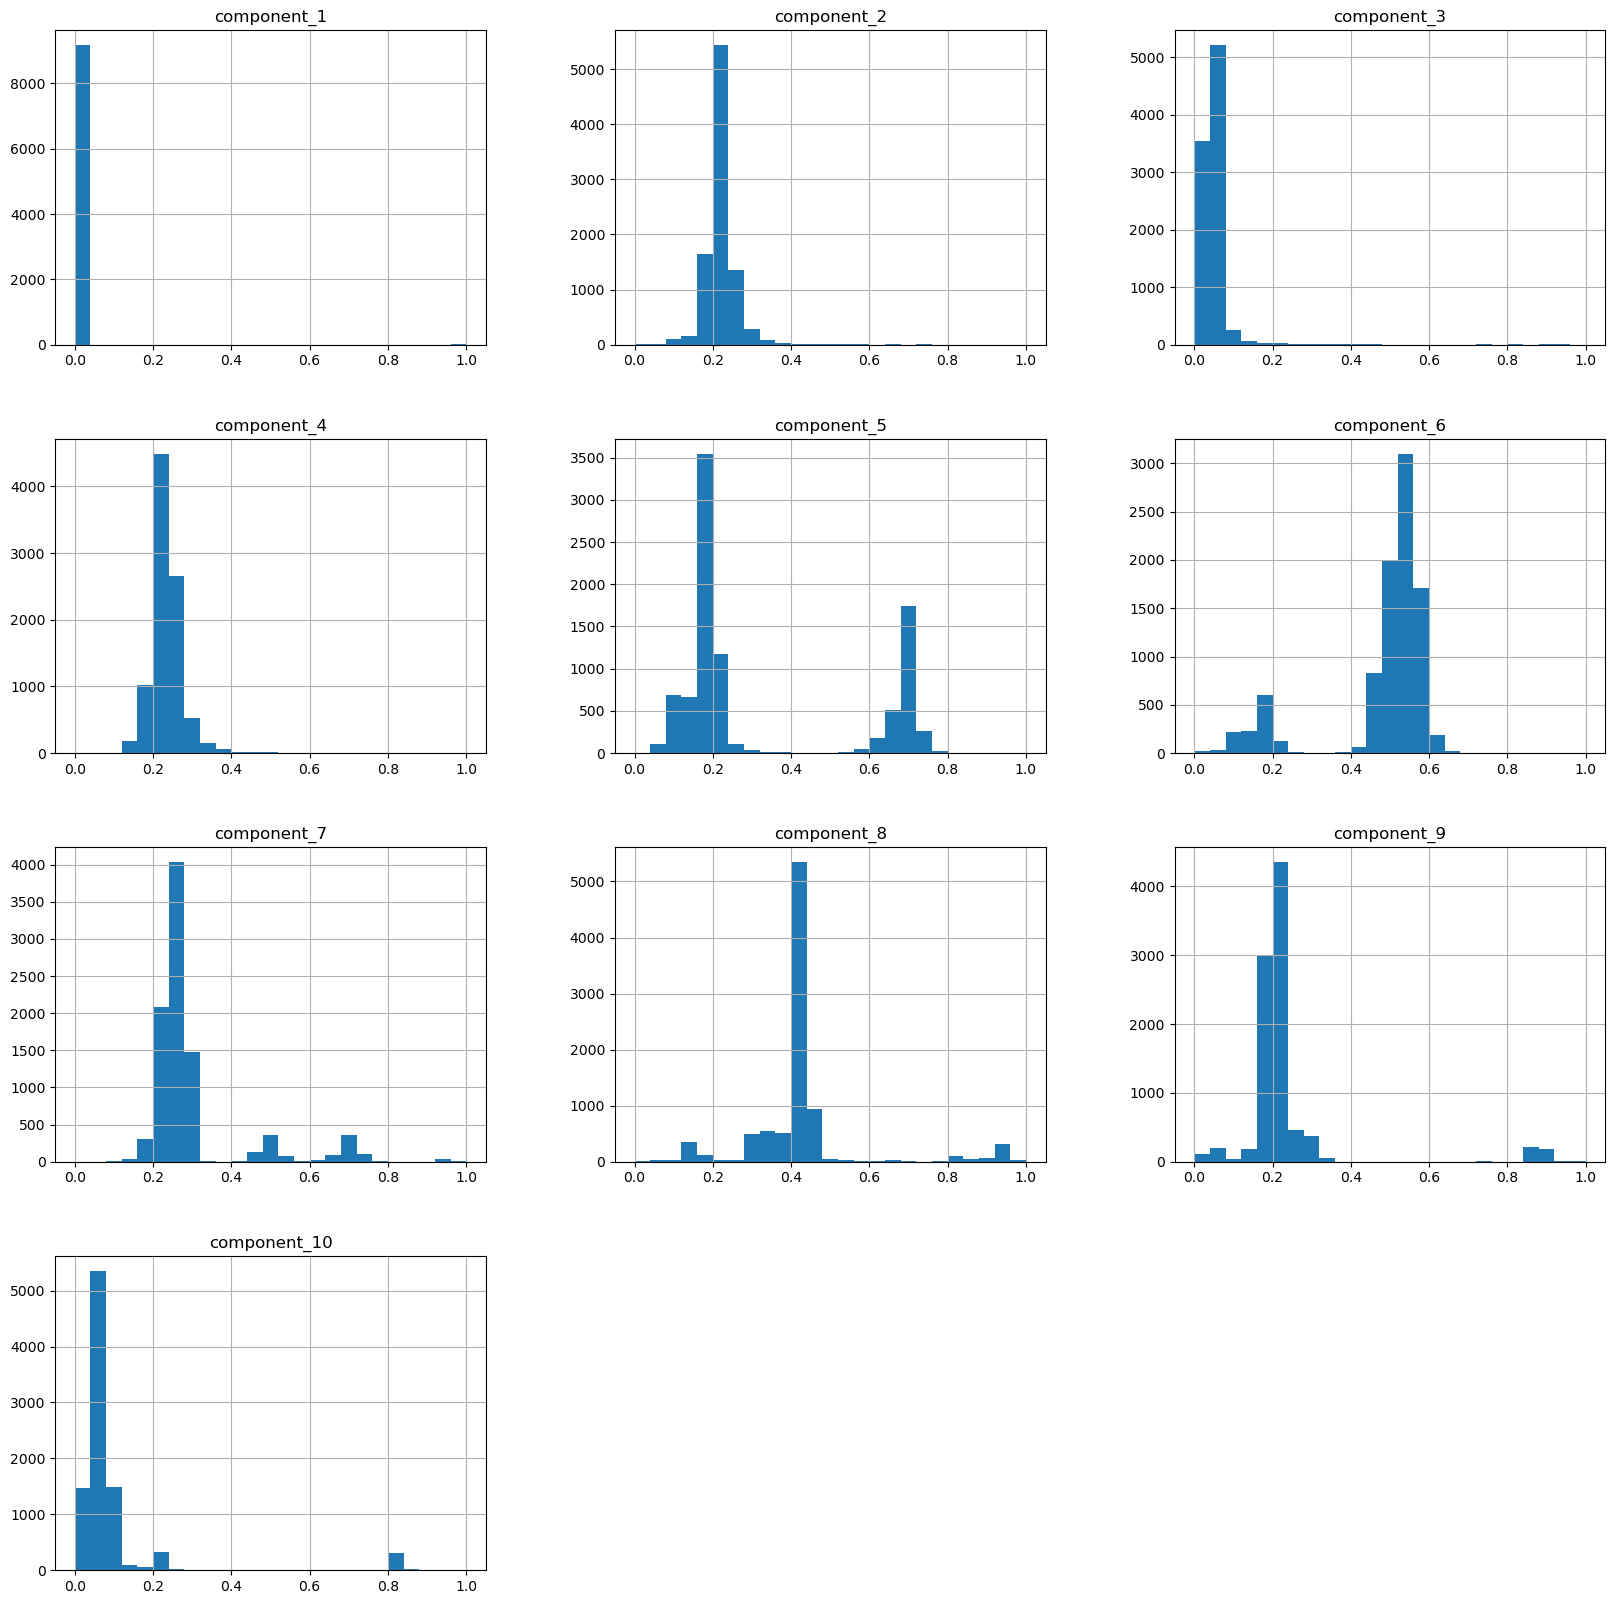

In [37]:
X_pca.hist(bins=25,figsize=(20,20));

All most all features are normally distributed and ranging between 0 to 1

In [38]:
X_pca.head()

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10
0,0.000427,0.217548,0.038212,0.234203,0.156810,0.489489,0.489980,0.939149,0.230517,0.035735
1,0.000427,0.217265,0.040672,0.235248,0.191567,0.554206,0.245529,0.421427,0.205135,0.048389
2,0.000611,0.217307,0.040294,0.238660,0.171438,0.581569,0.699886,0.145008,0.293679,0.094074
3,0.000534,0.217307,0.040294,0.235225,0.191424,0.554148,0.245542,0.421467,0.205128,0.048350
4,0.000473,0.217308,0.040293,0.235225,0.191435,0.554150,0.245549,0.421462,0.205126,0.048349


In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_pca,y,test_size=.33,random_state=42)

### Model Selection

In [40]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [41]:
lst=[LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,SVC,KNeighborsClassifier,XGBClassifier]
for i in lst:
    model=i().fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(i)
    print(accuracy_score(y_pred,y_test))
    print(classification_report(y_pred,y_test))

<class 'sklearn.linear_model._logistic.LogisticRegression'>
0.74000660720185
              precision    recall  f1-score   support

           0       0.06      0.27      0.09        11
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           5       0.26      0.83      0.40        24
           6       0.01      1.00      0.01         1
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
    

Got F1 score as 88% with XG boost PCA

### Without PCA

In [42]:
for i in data.columns:
    print("n\n")
    print(i)
    print(data[i].unique())

n

age
[   29    41    36    32    60    77    28    54    42    51    37    16
    43    63    40    75    56    85    71    67    55    61    46    44
    82    64    70    33    59    53    52    49    35    48    27    69
    76    73    68    66    30    88    38    58    21    45    83    62
    25    86    72    14    15    39    26    20    80    90    23    18
    13    78    24    81    92    57    74     9    47    17    11    50
    34     8    79    31    65    84    12    10    19    22     1     2
    97     6    89    87   455    93     7    91     5    94     4 65511
    95 65512     3 65526]
n

sex
[0 1]
n

on thyroxine
[0 1]
n

query on thyroxine
[0 1]
n

on antithyroid medication
[0 1]
n

sick
[0 1]
n

pregnant
[0 1]
n

thyroid surgery
[0 1]
n

I131 treatment
[0 1]
n

query hypothyroid
[1 0]
n

query hyperthyroid
[0 1]
n

lithium
[0 1]
n

goitre
[0 1]
n

tumor
[0 1]
n

hypopituitary
[0 1]
n

psych
[0 1]
n

TSH
[3.0000000e-01 1.6000000e+00 1.4000000e+00 7.0000000e-01

age,sex,TSH,T3,T4U,FTI columns has large unique data so we need to normalize it

In [43]:
cols=['age','sex','TSH','T3','T4U','FTI']
for i in cols:
    data[i]=scaler.fit_transform(data[[i]]) #Normalizing the data 

In [44]:
X=data
y=thyroid['target']

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.33,random_state=42)

In [46]:
lst=[LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,SVC,KNeighborsClassifier,XGBClassifier]
for i in lst:
    model=i().fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(i)
    print(accuracy_score(y_pred,y_test))
    print(classification_report(y_pred,y_test))

<class 'sklearn.linear_model._logistic.LogisticRegression'>
0.7532210109018831
              precision    recall  f1-score   support

           0       0.07      0.44      0.13         9
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           5       0.30      0.88      0.45        26
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.29      0.84      0.43        43
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.04      1.00      0.08         2
          13       0.06      1.00      0.11         2
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
  

Got F1 score as 91% with XG boost without PCA